<a href="https://colab.research.google.com/github/mamma-miaaa/CA683/blob/master/flights_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Variables Dictionary**
- YEAR: Year of the Flight Trip
- MONTH: Month of the Flight Trip
- DAY: Day of the Flight Trip
- DAY_OF_WEEK: Day of week of the Flight Trip
- AIRLINE: Airline Identifier
- FLIGHT_NUMBER: Flight Identifier
- TAIL_NUMBER: Aircraft Identifier
- ORIGIN_AIRPORT: Starting Airport
- DESTINATION_AIRPORT: Destination Airport
- SCHEDULED_DEPARTURE: Planned Departure Time
- DEPARTURE_TIME: WHEEL_OFF - TAXI_OUT
- DEPARTURE_DELAY: Total Delay on Departure
- TAXI_OUT: The time duration elapsed between departure from the origin airport gate and wheels off
- WHEELS_OFF: The time point that the aircraft's wheels leave the ground
- SCHEDULED_TIME: Planned time amount needed for the flight trip
- ELAPSED_TIME: AIR_TIME + TAXI_IN + TAXI_OUT
- AIR_TIME: The time duration between wheels_off and wheels_on time
- DISTANCE: Distance between two airports
- WHEELS_ON: The time point that the aircraft's wheels touch on the ground
- TAXI_IN: The time duration elapsed between wheels-on and gate arrival at the destination airport
- SCHEDULED_ARRIVAL: Planned arrival time
- ARRIVAL_TIME: WHEELS_ON + TAXI_IN
- ARRIVAL_DELAY: ARRIVAL_TIME - SCHEDULED_ARRIVAL
- DIVERTED: Aircraft landed on airport that out of schedule
- CANCELLED: Flight Cancelled (1 = cancelled)
- CANCELLATION_REASON: Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security

- AIR_SYSTEM_DELAY: Delay caused by air system
- SECURITY_DELAY: Delay caused by security
- AIRLINE_DELAY: Delay caused by the airline
- LATE_AIRCRAFT_DELAY: Delay caused by aircraft
- WEATHER_DELAY: Delay caused by weather

# **Import Libraries**

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib as mpl

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Import Data Sets**

In [0]:
# Import original flights data
#path_flights = '/content/gdrive/My Drive/data/flights.csv'
#flights_df = pd.read_csv(path_flights)

# Import Airports data 1
path_airports_2 = '/content/gdrive/My Drive/data/L_AIRPORT_ID.csv'
airports2_df = pd.read_csv(path_airports_2)

# Import Airports data 2
path_airports_3 = '/content/gdrive/My Drive/data/L_AIRPORT.csv'
airports3_df = pd.read_csv(path_airports_3)

# **Data Transformation - fix airport codes**

In [0]:
# Join the airports_ID & airpots and save as a new data set (df_Origin_Airport)
def convert(x, data):
  if type(x) is int:
    return x
  elif x.isdigit():
    return int(x)
  elif type(x) is str:
    x = data[x][0]
    # print(x)
    return x
  else:
    return x

df_airport_code = pd.merge(airports3_df,airports2_df, on='Description')
df_airport_code.drop(columns='Description', inplace=True)
df_airport_code.drop_duplicates(subset=['Code_x'], inplace=True, ignore_index=True)
# df_airport_code = df_airport_code.set_index('Code_x').T.to_dict('list')

#flights_df['ORIGIN_AIRPORT'] = flights_df['ORIGIN_AIRPORT'].apply(lambda x, y: convert(x, y), y=df_airport_code)
#flights_df['DESTINATION_AIRPORT'] = flights_df['DESTINATION_AIRPORT'].apply(lambda x, y: convert(x, y), y=df_airport_code)

#print(flights_df['DESTINATION_AIRPORT'].unique().tolist())

#path = '/content/gdrive/My Drive/data/df_ORIGIN_AIRPORT_numeric.csv'
#flights_df.to_csv(path, index=False)

# **Import Final Flight Data Set**

In [0]:
# Import Flights data 2
path_flights_1 = '/content/gdrive/My Drive/data/df_ORIGIN_AIRPORT_numeric.csv'
flights_df = pd.read_csv(path_flights_1)

# Import Airports data 3
path_airports = '/content/gdrive/My Drive/data/airports.csv'
airports_df = pd.read_csv(path_airports)

# Import Airlines data 
path_airlines = '/content/gdrive/My Drive/data/airlines.csv'
airlines_df = pd.read_csv(path_airlines)

# **Remove Variables we do not need for analysis**
- Merge Airline and Flights data to get AIRLINE
- Get Basic Data Discription 
- Cancelled Flights as we want to predic delayed flights
- Flight Number, Tail Number, Diverted, Cancelled, Cancellation Reasons - not relevant for prediction analysis
 

In [0]:
# Join the airline & flights data 
df1 = pd.merge(flights_df, airlines_df, left_on='AIRLINE', right_on='IATA_CODE', how='left')
df1 = df1.drop(['IATA_CODE'], axis=1)

In [0]:
#How many unique origin airports and destination airports?
df1_origin_airport_unique=len(df1.ORIGIN_AIRPORT.unique())
df1_dest_airport_unique=len(df1.DESTINATION_AIRPORT.unique())
print("Origin Airports: ", df1_origin_airport_unique)
print("Destination Airports: ", df1_dest_airport_unique)

#How many flights that have a scheduled departure time later than 18h00?
n_night_flight=len(df1.SCHEDULED_DEPARTURE[df1.SCHEDULED_DEPARTURE>1800])
print("Night Flights over Total: ", (n_night_flight/len(df1))*100, "%")


number_of_departure_delayed_flights = df1["DEPARTURE_DELAY"].apply(lambda s: 1 if s!=0 else 0);
number_of_arrival_delayed_flights = df1["ARRIVAL_DELAY"].apply(lambda s: 1 if s>=15 else 0);

# print("Total number of flights: "+str(len(df1)))
# print("Number of cancelled flights: "+str(sum(df1["CANCELLED"])))
# print("Number of departure delayed flights: "+str(sum(number_of_departure_delayed_flights)))
# print("Number of arrival delayed flights: "+str(sum(number_of_arrival_delayed_flights)))
# print("Number of diverted flights: "+str(sum(df1["DIVERTED"])))
# print("Number of not cancelled flights: "+str(len(df1)-sum(df1["CANCELLED"])))
# print("Number of not departure delayed flights: "+str(len(df1)-sum(number_of_departure_delayed_flights)))
# print("Number of not arrival delayed flights: "+str(len(df1)-sum(number_of_arrival_delayed_flights)))

print("Percentage of cancelled flights: "+str((sum(df1["CANCELLED"])*1.0/len(df1))*100)+"%")
print("Percentage of diverted flights: "+str((sum(df1["DIVERTED"])*1.0/len(df1))*100)+"%")
print("Percentage of delayed flights: "+str((sum(number_of_arrival_delayed_flights)*1.0/len(df1))*100)+"%")

Origin Airports:  324
Destination Airports:  324
Night Flights over Total:  21.446984995391883 %
Percentage of cancelled flights: 1.5446430612129514%
Percentage of diverted flights: 0.26098631759424473%
Percentage of delayed flights: 18.275039744261935%


In [0]:
# Remove cancelled flights 
df1 = df1[df1['CANCELLED'] == 0]

# Remove variables that we do not need
variables_to_remove = ['FLIGHT_NUMBER', 'TAIL_NUMBER', 'DIVERTED','CANCELLED','CANCELLATION_REASON']

df = df1.drop(variables_to_remove, axis = 1, inplace = False)
df.reset_index(inplace=True, drop=True)


- Select Sub Data-Set with delayed flights (delay time more than 15 minutes)


In [0]:
df_delay = df.dropna(subset=['ARRIVAL_DELAY'])
df_delay.reset_index(inplace=True, drop=True)
df_delay = df.drop(index=np.where(df['ARRIVAL_DELAY'].values <= 15)[0], inplace=False)
df_delay.reset_index(inplace=True, drop=True)
print(df_delay.info())

# **Exploratory Data Analysis**

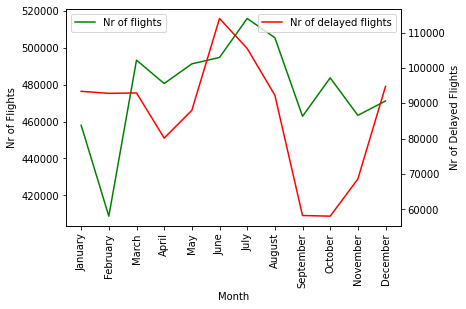

In [0]:
#Flights per month
months = []
for month in range(1,13):
    months.append(datetime.datetime(year=1994, month=month, day=1).strftime("%B"))

fl_per_month = df.groupby('MONTH').count().YEAR.values
delay_fl_per_month = df_delay.groupby('MONTH').count().YEAR.values

fig, ax = plt.subplots()

ax.set_xlabel('Month')
ax.set_ylabel('Nr of Flights')
ax.set_xticks(range(12))
ax.set_xticklabels(months, rotation='vertical')
ax.plot(range(12), fl_per_month, c='g', label='Nr of flights')
ax2 = ax.twinx()
ax2.plot(range(12), delay_fl_per_month, c='r', label='Nr of delayed flights')
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
ax2.set_ylabel('Nr of Delayed Flights')

plt.show()


[844470 829528 845168 860230 853404 691796 804599]


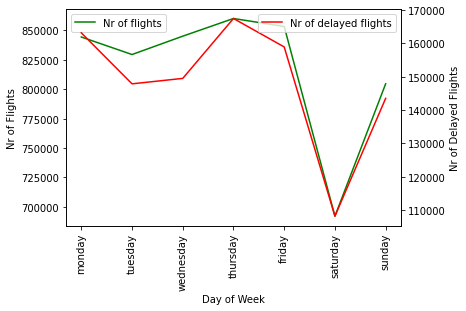

In [0]:
#flights by weekday

days=['monday','tuesday','wednesday','thursday','friday','saturday','sunday']

d_airport_delay_min = df_delay_top_da.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean()

flights_bydayofweek = df.groupby('DAY_OF_WEEK').count().YEAR.values

delay_fl_bydayofweek = df_delay.groupby('DAY_OF_WEEK').count().YEAR.values

print (flights_bydayofweek)
# flights_bydayofweek = df.groupby('DAY_OF_WEEK').count().YEAR.values
# delay_fl_bydayofweek = df_delay.groupby('DAY_OF_WEEK').count().YEAR.values

fig, ax = plt.subplots()

ax.set_xlabel('Day of Week')
ax.set_ylabel('Nr of Flights')
ax.set_xticks(range(7))
ax.set_xticklabels(days, rotation='vertical')

ax.plot(range(7), flights_bydayofweek, c= 'g', label='Nr of flights')
ax.legend(loc="upper left")


ax2 = ax.twinx()
ax2.plot(range(7), delay_fl_bydayofweek, c='r',label='Nr of delayed flights')
ax2.legend(loc="upper right")
ax2.set_ylabel('Nr of Delayed Flights')

plt.show()

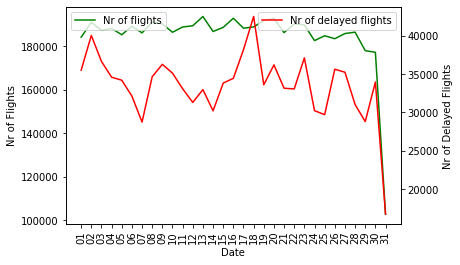

In [0]:
#Flights per day
days = []
for day in range(1,32):
    days.append(datetime.datetime(year=1994, month=1, day=day).strftime("%d"))

fl_per_day = df.groupby('DAY').count().YEAR.values
delay_fl_per_day = df_delay.groupby('DAY').count().YEAR.values

fig, ax = plt.subplots()

ax.set_xlabel('Date')
ax.set_ylabel('Nr of Flights')
ax.set_xticks(range(31))
ax.set_xticklabels(days,rotation='vertical')
ax.plot(range(31), fl_per_day, c='g', label='Nr of flights')
ax2 = ax.twinx()
ax2.plot(range(31), delay_fl_per_day, c='r', label='Nr of delayed flights')
ax.legend(loc="upper left")
ax2.legend(loc="upper right")
ax2.set_ylabel('Nr of Delayed Flights')

plt.show()

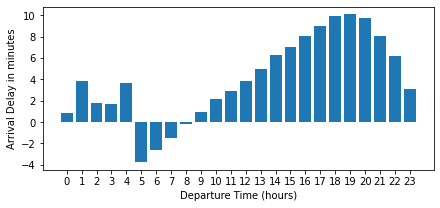

In [0]:
# Average delaed flights per hour

## covert scheduled time value to hour
df['HOUR']=(df.SCHEDULED_DEPARTURE/100).astype(int)

hour_avg_delay = pd.DataFrame(data=df.groupby('HOUR')['ARRIVAL_DELAY'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(7,3))

x = hour_avg_delay['HOUR']
y = hour_avg_delay['ARRIVAL_DELAY']
x_pos = np.arange(len(x))

ax.bar(x_pos,y)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_pos)

ax.xaxis.set_label_text("Departure Time (hours)")
ax.yaxis.set_label_text("Arrival Delay in minutes")

plt.show()


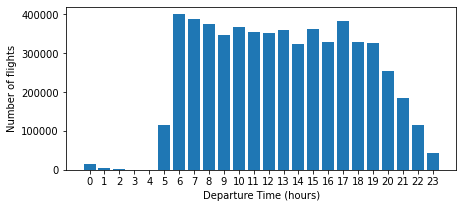

In [0]:
# Average flights per hour

df['HOUR']=(df.SCHEDULED_DEPARTURE/100).astype(int)

avg_fl_hour = pd.DataFrame(data=df.groupby('HOUR')['AIRLINE_y'].count()).reset_index()

fig, ax = plt.subplots(figsize=(7,3))

x_1 = avg_fl_hour['HOUR']
y_1 = avg_fl_hour['AIRLINE_y']
_x_pos = np.arange(len(x_1))

ax.bar(_x_pos,y_1)
ax.set_xticks(_x_pos)
ax.set_xticklabels(_x_pos)

ax.xaxis.set_label_text("Departure Time (hours)")
ax.yaxis.set_label_text("Number of flights")

plt.show()


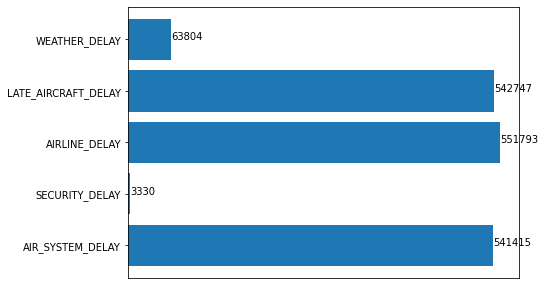

In [0]:
# Reasons for flight delays

delays = df_delay[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

delays_count = delays[delays>0].count()
delay_reason = delays_count.index.values
delay_reason_values = delays_count.values.tolist()

fig, ax = plt.subplots(figsize = (7,5))  

ax.barh(delay_reason,delay_reason_values)
ax.set_xticks([]) 
for index, value in enumerate(delay_reason_values):
    plt.text(value, index, str(value))


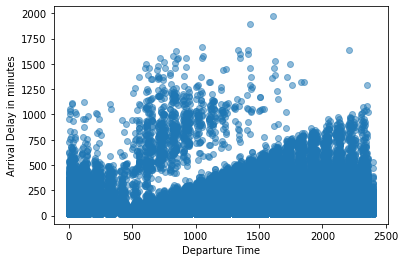

In [0]:
# delay by departure time
fig, ax = plt.subplots()

x = df_delay['DEPARTURE_TIME'].values
y = df_delay['ARRIVAL_DELAY'].values

plt.scatter(x, y, alpha=0.5)

plt.xlabel("Departure Time")
plt.ylabel("Arrival Delay in minutes")

plt.show()

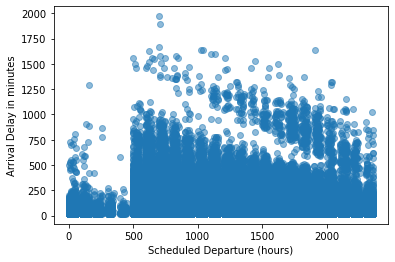

In [0]:
# delay by sceduled departure time
fig, ax = plt.subplots()

x1 = df_delay['SCHEDULED_DEPARTURE'].values
y1 = df_delay['ARRIVAL_DELAY'].values

plt.scatter(x1, y1, alpha=0.5)

plt.xlabel("Scheduled Departure (hours)")
plt.ylabel("Arrival Delay in minutes")

plt.show()

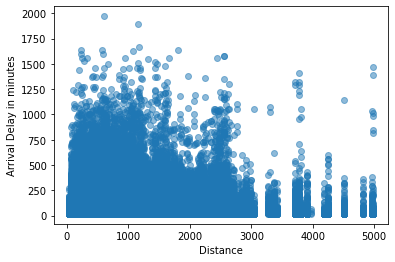

In [0]:
# Distance and Arrival Delay = has nothing to do with ARRIVAL_DELAY!!! can be removed from features

fig, ax = plt.subplots()

x2 = df_delay['DISTANCE'].values
y2 = df_delay['ARRIVAL_DELAY'].values

plt.scatter(x2, y2, alpha=0.5)

plt.xlabel("Distance")
plt.ylabel("Arrival Delay in minutes")

plt.show()

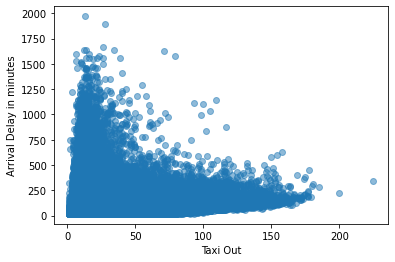

In [0]:
# Taxi Out : The time duration elapsed between departure from the origin airport gate and wheels off

fig, ax = plt.subplots()

x3 = df_delay['TAXI_OUT'].values
y3 = df_delay['ARRIVAL_DELAY'].values

plt.scatter(x3, y3, alpha=0.5)

plt.xlabel("Taxi Out")
plt.ylabel("Arrival Delay in minutes")

plt.show()

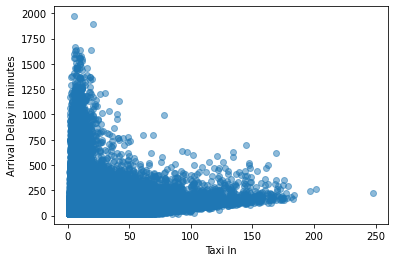

In [0]:
# Taxi IN : The time duration elapsed between wheels-on and gate arrival at the destination airport

fig, ax = plt.subplots()

x4 = df_delay['TAXI_IN'].values
y4 = df_delay['ARRIVAL_DELAY'].values

plt.scatter(x4, y4, alpha=0.5)

plt.xlabel("Taxi In")
plt.ylabel("Arrival Delay in minutes")

plt.show()

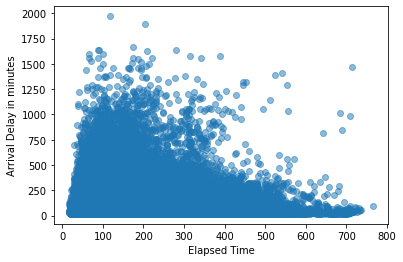

In [0]:
# ELAPSED_TIME : (AIR_TIME + TAXI_IN + TAXI_OUT)

fig, ax = plt.subplots()

x5 = df_delay['ELAPSED_TIME'].values
y5 = df_delay['ARRIVAL_DELAY'].values

plt.scatter(x5, y5, alpha=0.5)

plt.xlabel("Elapsed Time")
plt.ylabel("Arrival Delay in minutes")

plt.show()

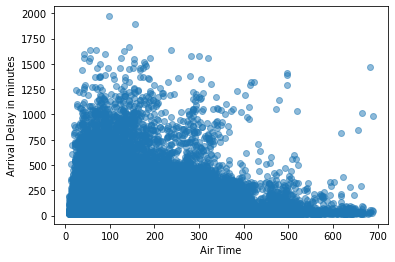

In [0]:
# AIR_TIME: The time duration between wheels_off and wheels_on time

fig, ax = plt.subplots()

x6 = df_delay['AIR_TIME'].values
y6 = df_delay['ARRIVAL_DELAY'].values

plt.scatter(x6, y6, alpha=0.5)

plt.xlabel("Air Time")
plt.ylabel("Arrival Delay in minutes")

plt.show()

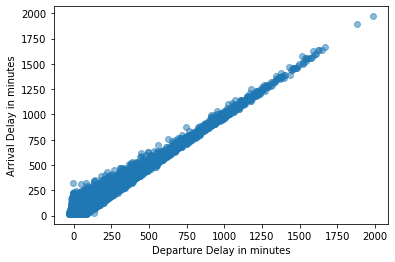

In [0]:
# arrival vs departure delay
fig, ax = plt.subplots()

x7 = df_delay['DEPARTURE_DELAY'].values
y7 = df_delay['ARRIVAL_DELAY'].values

plt.scatter(x7, y7, alpha=0.5)

plt.xlabel("Departure Delay in minutes")
plt.ylabel("Arrival Delay in minutes")

plt.show()

In [0]:
# arrival delays by airlines
df['DELAYED'] = df['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 15 else 0)

In [0]:
# extract statistical parameters from a grouby objet:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': round(group.mean(),0)}

global_stats = df['ARRIVAL_DELAY'].groupby(df['AIRLINE_y']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE_y,,,,
Virgin America,-81.0,651.0,61248.0,5.0
Hawaiian Airlines Inc.,-67.0,1467.0,76041.0,2.0
Frontier Airlines Inc.,-73.0,1101.0,90090.0,13.0
Spirit Air Lines,-60.0,833.0,115193.0,14.0
Alaska Airlines Inc.,-82.0,950.0,171439.0,-1.0
US Airways Inc.,-87.0,750.0,194223.0,4.0
JetBlue Airways,-76.0,1002.0,262042.0,7.0
American Eagle Airlines Inc.,-63.0,1528.0,278791.0,6.0
United Air Lines Inc.,-81.0,1294.0,507762.0,5.0


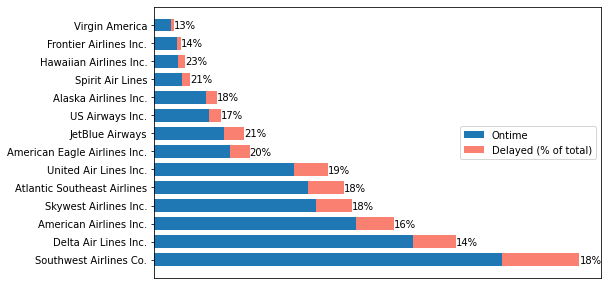

In [0]:
# delays by Airline v.1 
delayed_airlines = df.drop(index=np.where(df['DELAYED'].values == 0)[0], inplace=False)
delayed_airlines.reset_index(inplace=True, drop=True)

airline_d = delayed_airlines['AIRLINE_y'].value_counts(sort=True)
label_d = airline_d.index
values_d = airline_d.values

non_delayed_airlines = df.drop(index=np.where(df['DELAYED'].values == 1)[0], inplace=False)
non_delayed_airlines.reset_index(inplace=True, drop=True)

airline_nd = non_delayed_airlines['AIRLINE_y'].value_counts()
label_nd = airline_nd.index
values_nd = airline_nd.values


fig, ax = plt.subplots(figsize = (8,5))  
w = 0.7
ax1 = ax.barh(label_nd, values_nd, w,  color="tab:blue", label = 'Ontime')
ax2 = ax.barh(label_nd, values_d, w, left=values_nd, color="salmon", label = 'Delayed (% of total)')

ax.legend(loc="right")

values_ = (100. * values_d/(values_d+values_nd)).astype(int).round(0)

# ax.barh(label_nd, values, w)
ax.set_xticks([])

for r1, r2, y1 in zip(ax1, ax2, values_):
    h1 = r1.get_width()
    h2 = r2.get_width()
    ax.text(r2.get_x() + r2.get_width() +1.25, r2.get_y()+ r2.get_height()/2 -0.3,'{:.0f}%'.format(y1),ha='left', va='bottom')



plt.show()
plt.close()


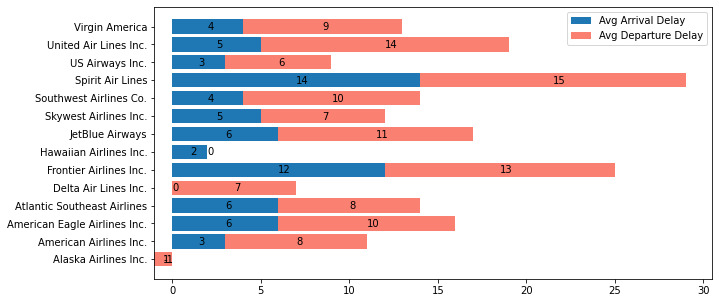

In [0]:
# average time delays by Airline

airline_delay_min = df.groupby('AIRLINE_y').agg({'ARRIVAL_DELAY':'mean','DEPARTURE_DELAY':'mean'})
airline_delay_min = airline_delay_min.reset_index()

values_ad = airline_delay_min['ARRIVAL_DELAY'].round(1).astype(int).tolist()
values_dd = airline_delay_min['DEPARTURE_DELAY'].round(1).astype(int).tolist()


y_pos_1 = np.arange(len(values_ad))

label = airline_delay_min['AIRLINE_y'].tolist()

fig, ax = plt.subplots(figsize=(10,5))  

ax11 = ax.barh(y_pos_1, values_ad, color="tab:blue", label = 'Avg Arrival Delay')
ax22 = ax.barh(y_pos_1, values_dd, left=values_ad, color="salmon", label = 'Avg Departure Delay')
ax.set_yticks(y_pos_1)
ax.set_yticklabels(label)
# ax.set_xticks([])
ax.legend(loc = "upper right")

for r1, r2, y11, y22 in zip(ax11, ax22, values_ad, values_dd):
    h1 = r1.get_width()
    h2 = r2.get_width()
    ax.text(r1.get_x() + r1.get_width()/2, r1.get_y()+ r1.get_height()/2 -0.3,y11 ,ha='left', va='bottom')
    ax.text(r2.get_x() + r2.get_width()/2, r2.get_y()+ r2.get_height()/2 -0.3,y22,ha='left', va='bottom')



plt.show()
plt.close()

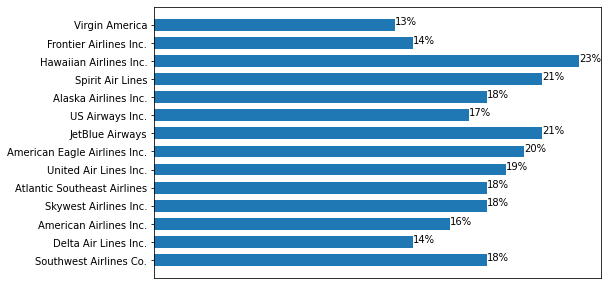

In [0]:
# delays by Airline v.2 (delay % of total number of flights)
fig, ax = plt.subplots(figsize = (8,5))  
w = 0.65

_values_ = (100. * values_d/(values_d+values_nd)).astype(int).round(1)
ax.barh(label_nd, _values_, w)
ax.set_xticks([])

for label_nd, value in enumerate(_values_):
     ax.text(value, label_nd, str(value)+ '%')

plt.show()
plt.close()

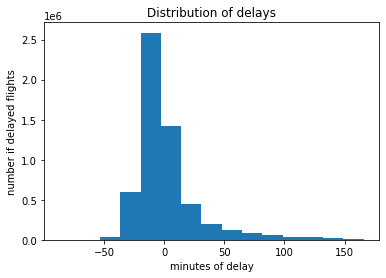

-5.0


In [0]:
# Distribution of delays
fig, ax = plt.subplots()

X = df.loc[:, ['ARRIVAL_DELAY']].dropna().T.values
h=np.percentile(X,99,interpolation = "nearest")
X = X[X<h]

plt.hist(X, bins=15)
plt.ylabel('number if delayed flights')
plt.xlabel('minutes of delay')
plt.title('Distribution of delays')

plt.show()

print(np.median(X))

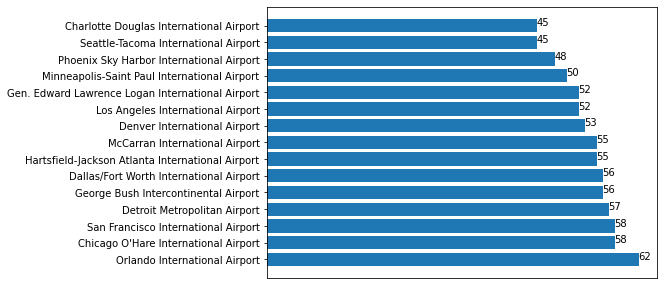

In [0]:
# average time delays by Origin_AIRPORT 
airport_top = df['ORIGIN_AIRPORT'].value_counts(sort=True)[:15]
airport_top_list = airport_top.index.tolist()


df_delay_top = df_delay[df_delay['ORIGIN_AIRPORT'].isin(airport_top_list)]

airport_delay_min = df_delay_top.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean()
airport_delay_min = airport_delay_min.sort_values(axis = 0,ascending=False)
airport_delay_min

df_airport_code_name = pd.merge(df_airport_code,airports_df, left_on='Code_x', right_on = 'IATA_CODE')
vars_to_remove = ['IATA_CODE','STATE', 'COUNTRY','LATITUDE','LONGITUDE','Code_x','CITY']
df_airport_code_name=df_airport_code_name.drop(vars_to_remove, axis = 1, inplace = False)
df_airport_code_name.reset_index(inplace=True, drop=True)
df_airport_code_name = df_airport_code_name.set_index('Code_y').T.to_dict('list')


airport_delay_min = airport_delay_min.reset_index()

airport_delay_min=airport_delay_min.replace({'ORIGIN_AIRPORT': df_airport_code_name})

values = airport_delay_min['DEPARTURE_DELAY'].round(1).astype(int).tolist()
y_pos = np.arange(len(values))

label = airport_delay_min['ORIGIN_AIRPORT'].tolist()



fig, ax = plt.subplots(figsize=(7,5))  

ax.barh(y_pos, values)

ax.set_yticks(y_pos)
ax.set_yticklabels(label)
ax.set_xticks([])

for label, values in enumerate(values):
    plt.text(values, label, str(values))

plt.show()
plt.close()


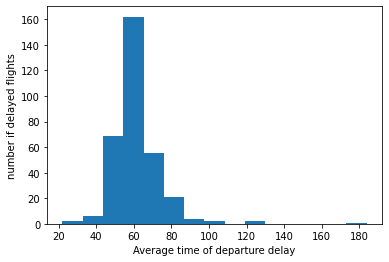

In [0]:
# average time delays by ORIGIN_AIRPORT 

airport_delay_min_dist = df_delay.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean()
airport_delay_min_dist = airport_delay_min_dist.reset_index()

delay_values = airport_delay_min_dist['DEPARTURE_DELAY'].round(1).astype(int).tolist()

plt.hist(delay_values, bins=15)
plt.ylabel('number if delayed flights')
plt.xlabel('Average time of departure delay')

plt.show()




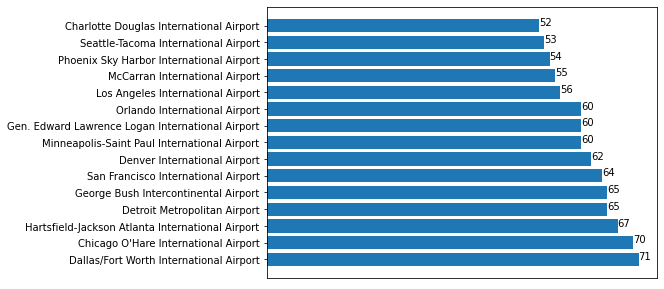

In [0]:
# average time delays by DESTINATION_AIRPORT 


dest_airport_top = df['DESTINATION_AIRPORT'].value_counts(sort=True)[:15]
dest_airport_top_list = dest_airport_top.index.tolist()


df_delay_top_da = df_delay[df_delay['DESTINATION_AIRPORT'].isin(dest_airport_top_list)]

d_airport_delay_min = df_delay_top_da.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean()
d_airport_delay_min = d_airport_delay_min.sort_values(axis = 0,ascending=False)


# df_airport_code_name = pd.merge(df_airport_code,airports_df, left_on='Code_x', right_on = 'IATA_CODE')
# vars_to_remove = ['IATA_CODE','STATE', 'COUNTRY','LATITUDE','LONGITUDE','Code_x','CITY']
# df_airport_code_name=df_airport_code_name.drop(vars_to_remove, axis = 1, inplace = False)
# df_airport_code_name.reset_index(inplace=True, drop=True)
# df_airport_code_name = df_airport_code_name.set_index('Code_y').T.to_dict('list')


d_airport_delay_min = d_airport_delay_min.reset_index()

d_airport_delay_min=d_airport_delay_min.replace({'DESTINATION_AIRPORT': df_airport_code_name})

d_values = d_airport_delay_min['ARRIVAL_DELAY'].round(1).astype(int).tolist()
y_pos_ = np.arange(len(d_values))

d_label = d_airport_delay_min['DESTINATION_AIRPORT'].tolist()



fig, ax = plt.subplots(figsize=(7,5))  

ax.barh(y_pos_, d_values)

ax.set_yticks(y_pos_)
ax.set_yticklabels(d_label)
ax.set_xticks([])

for d_label, d_values in enumerate(d_values):
    plt.text(d_values, d_label, str(d_values))

plt.show()
plt.close()

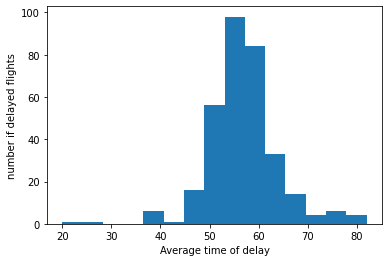

57.0


In [0]:
# average time delays by DESTINATION_AIRPORT 

d_airport_delay_min_dist = df_delay.groupby('DESTINATION_AIRPORT')['ARRIVAL_DELAY'].mean()
d_airport_delay_min_dist = d_airport_delay_min_dist.reset_index()

d_delay_values = d_airport_delay_min_dist['ARRIVAL_DELAY'].round(1).astype(int).tolist()

plt.hist(d_delay_values, bins=15)
plt.ylabel('number if delayed flights')
plt.xlabel('Average time of delay')

plt.show()

print(np.median(d_delay_values))

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5729195 entries, 0 to 5729194
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE_x            object 
 5   ORIGIN_AIRPORT       int64  
 6   DESTINATION_AIRPORT  int64  
 7   SCHEDULED_DEPARTURE  int64  
 8   DEPARTURE_TIME       float64
 9   DEPARTURE_DELAY      float64
 10  TAXI_OUT             float64
 11  WHEELS_OFF           float64
 12  SCHEDULED_TIME       float64
 13  ELAPSED_TIME         float64
 14  AIR_TIME             float64
 15  DISTANCE             int64  
 16  WHEELS_ON            float64
 17  TAXI_IN              float64
 18  SCHEDULED_ARRIVAL    int64  
 19  ARRIVAL_TIME         float64
 20  ARRIVAL_DELAY        float64
 21  AIR_SYSTEM_DELAY     float64
 22  SECURITY_DELAY       float64
 23  AIRLINE_DELAY        float64
 24

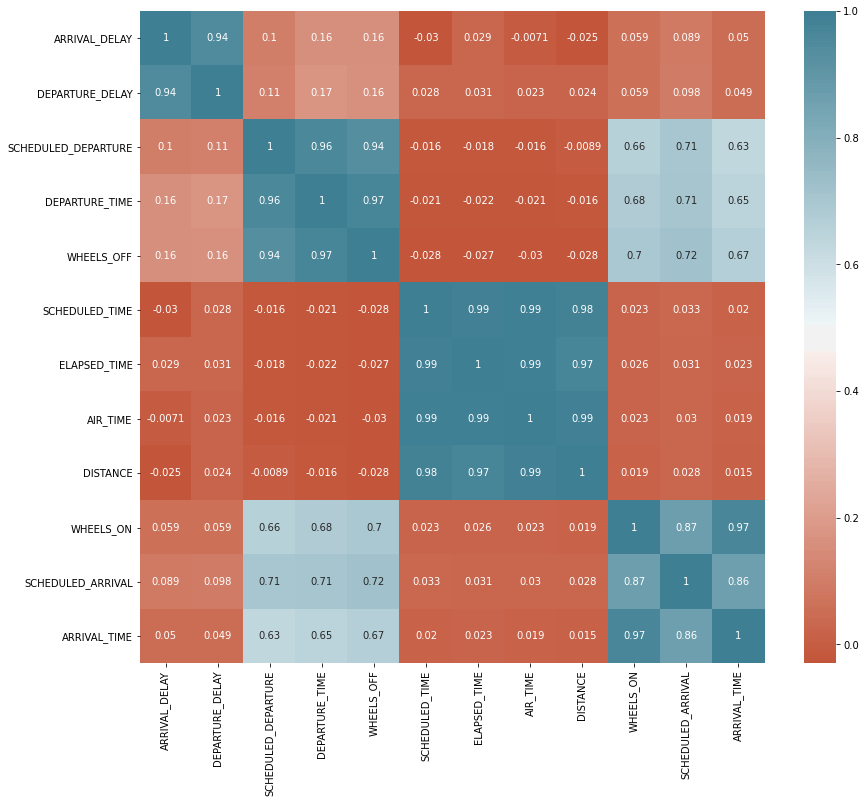

In [0]:
df_corr_strong = df[['ARRIVAL_DELAY','DEPARTURE_DELAY','SCHEDULED_DEPARTURE','DEPARTURE_TIME','WHEELS_OFF','SCHEDULED_TIME','ELAPSED_TIME',
              'AIR_TIME','DISTANCE','WHEELS_ON', 'SCHEDULED_ARRIVAL','ARRIVAL_TIME']]

df_corr = df[['MONTH', 'DAY','DAY_OF_WEEK','TAXI_OUT','TAXI_IN']]
# Dataframe correlation
del_corr = df_corr_strong.corr()

# Draw the figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()


# **Missing Values**

In [0]:
# create table with missing values 
miss_val = df.isnull().sum()
miss_val_perc = round(100 * miss_val / len (df), 1)
tbl_results = pd.concat([miss_val,miss_val_perc], axis = 1)
tbl_results = tbl_results.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})
tbl_results['Data Type'] = df.dtypes
tbl_results = tbl_results[tbl_results.iloc[:,0]!=0].sort_values('% of Total Values',ascending=False)
print ("Dataframe size: " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n" 
       "Columns with missing values: " + str(tbl_results.shape[0]))
tbl_results

Dataframe size: 27 columns and 5729195 Rows.
Columns with missing values: 12


,Missing Values,% of Total Values,Data Type
AIR_SYSTEM_DELAY,4665756,81.4,float64
SECURITY_DELAY,4665756,81.4,float64
AIRLINE_DELAY,4665756,81.4,float64
LATE_AIRCRAFT_DELAY,4665756,81.4,float64
WEATHER_DELAY,4665756,81.4,float64
ELAPSED_TIME,15187,0.3,float64
AIR_TIME,15187,0.3,float64
ARRIVAL_DELAY,15187,0.3,float64
SCHEDULED_TIME,1,0.0,float64
WHEELS_ON,2629,0.0,float64


In [0]:
# Remove variables that we do not need
variables_to_remove = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

df_new = df.drop(variables_to_remove, axis = 1, inplace = False)
df_new.reset_index(inplace=True, drop=True)

In [0]:
df_droped_nan = df_new.dropna(subset=['WHEELS_ON', 'TAXI_IN', 'ARRIVAL_TIME'])
df_droped_nan.reset_index(inplace=True, drop=True)
df_droped_nan = df_droped_nan.dropna(subset=['SCHEDULED_TIME'])
df_droped_nan.reset_index(inplace=True, drop=True)

df_droped_nan = df_droped_nan.dropna(subset=['ARRIVAL_DELAY'])
df_droped_nan.reset_index(inplace=True, drop=True)

df_droped_nan['AIR_TIME']= df_droped_nan['WHEELS_OFF']-df_droped_nan['WHEELS_ON']
df_droped_nan['ELAPSED_TIME']= df_droped_nan['AIR_TIME']+df_droped_nan['TAXI_IN']+df_droped_nan['TAXI_OUT']

In [0]:
variables_to_remove = ['AIRLINE_y', 'DISTANCE','YEAR','WHEELS_ON', 'WHEELS_OFF','DELAYED','HOUR',
                       'DEPARTURE_DELAY', 'DEPARTURE_TIME','ELAPSED_TIME','AIR_TIME','ARRIVAL_TIME']

df = df_droped_nan.drop(variables_to_remove, axis = 1, inplace = False)
df.reset_index(inplace=True, drop=True)

# path = '/content/gdrive/My Drive/data/df_ML.csv'
# df_droped_nan.to_csv(path, index=False)


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714008 entries, 0 to 5714007
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE_x            object 
 4   ORIGIN_AIRPORT       int64  
 5   DESTINATION_AIRPORT  int64  
 6   SCHEDULED_DEPARTURE  int64  
 7   TAXI_OUT             float64
 8   SCHEDULED_TIME       float64
 9   TAXI_IN              float64
 10  SCHEDULED_ARRIVAL    int64  
 11  ARRIVAL_DELAY        float64
dtypes: float64(4), int64(7), object(1)
memory usage: 523.1+ MB


# **Machine Learning**


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size':16})
# rc('text', usetex=True)

In [0]:
# Sub-data selection (top N Airports, Airlines)
N = 10

top_airports = df['ORIGIN_AIRPORT'].value_counts(sort=True).index.values[:N]
top_airlines = df['AIRLINE_x'].value_counts(sort=True).index.values[:N]
top_dest = df['DESTINATION_AIRPORT'].value_counts(sort=True).index.values[:N]
df = df[(df['ORIGIN_AIRPORT'].isin(top_airports)) & (df['AIRLINE_x'].isin(top_airlines))& (df['DESTINATION_AIRPORT'].isin(top_dest))]

# **One-Hot Encoding**

In [0]:
df = pd.get_dummies(df, prefix='', prefix_sep='')
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str)
df = pd.get_dummies(df, prefix='O', prefix_sep='_')

df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].astype(str)
df = pd.get_dummies(df, prefix='D', prefix_sep='_')

In [0]:

if 'ARRIVAL_DELAY' in df.columns:
  Y = df['ARRIVAL_DELAY'].values.astype(float)
  df.drop(columns='ARRIVAL_DELAY', inplace=True)

print(df.info())
X = df.values.astype(float)

XY = np.c_[X, Y]
XY = Normalizer().fit_transform(XY)

Y = XY[:, -1]
X = XY[:, :-1]

X_train, x, Y_train, y = train_test_split(X, Y, test_size=0.4)
X_test, X_val, Y_test, Y_val = train_test_split(x, y, test_size=0.5)
print(X_train.shape)

mod = MLPRegressor(hidden_layer_sizes=(100,20,20), activation='relu', learning_rate_init=0.001, max_iter=200, verbose=True)
# mod = LinearRegression()

mod.fit(X_train, Y_train)
Y_hat = mod.predict(X_train)

print(type(mod))
print('R Squared:', r2_score(Y_train, Y_hat)) # best is 1
print('MSE:', mse(Y_train, Y_hat)) # best is 0

residuals = np.abs(Y_hat - Y_train)
plt.hist(residuals)
plt.show()
plt.close()

plt.scatter(Y_train, Y_hat)
plt.show()
plt.close()

plt.plot(Y_train)
plt.show()
plt.close()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 438778 entries, 5 to 5713997
Data columns (total 37 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                438778 non-null  int64  
 1   DAY                  438778 non-null  int64  
 2   DAY_OF_WEEK          438778 non-null  int64  
 3   SCHEDULED_DEPARTURE  438778 non-null  int64  
 4   TAXI_OUT             438778 non-null  float64
 5   SCHEDULED_TIME       438778 non-null  float64
 6   TAXI_IN              438778 non-null  float64
 7   SCHEDULED_ARRIVAL    438778 non-null  int64  
 8   AA                   438778 non-null  uint8  
 9   B6                   438778 non-null  uint8  
 10  DL                   438778 non-null  uint8  
 11  EV                   438778 non-null  uint8  
 12  MQ                   438778 non-null  uint8  
 13  OO                   438778 non-null  uint8  
 14  UA                   438778 non-null  uint8  
 15  US              

RuntimeError: ignored

<Figure size 432x288 with 1 Axes>

RuntimeError: ignored

<Figure size 432x288 with 1 Axes>

RuntimeError: ignored

<Figure size 432x288 with 1 Axes>

In [0]:
def get_layers():
  n = np.random.randint(1,4,1).item()
  return tuple(np.random.randint(10,100,n))

Y = df['ARRIVAL_DELAY'].values.astype(float)
df.drop(columns='ARRIVAL_DELAY', inplace=True)
X = df.values.astype(float)

XY = np.c_[X, Y]
XY = Normalizer().fit_transform(XY)
# print(XY.shape)
Y = XY[:, -1]
X = XY[:, :-1]

X_train, x, Y_train, y = train_test_split(X, Y, test_size=0.3)

model = MLPRegressor(hidden_layer_sizes=(100,20,20), activation='relu', learning_rate_init=0.001, max_iter=200, verbose=False, validation_fraction=0.2)

param_dist = {'hidden_layer_sizes': [get_layers()], 'activation': ['relu', 'tanh', 'identity'], 'learning_rate_init': [0.01, 0.001, 0.0001], 'max_iter': [200, 400, 800], 'learning_rate': ['constant', 'invscaling', 'adaptive']}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=20, scoring='r2', verbose=1)

random_search.fit(X_train, Y_train)

print(random_search.best_estimator_)
print()
print(random_search.best_score_)
print()
bst = random_search.cv_results_['params'][random_search.best_index_]
print(bst)
# np.save('best_params.npy', bst)
# print()

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by us

In [0]:
np.random.seed(123191)

# Y = df['ARRIVAL_DELAY'].values.astype(float)
# df.drop(columns='ARRIVAL_DELAY', inplace=True)
# X = df.values.astype(float)

# XY = np.c_[X, Y]
# XY = Normalizer().fit_transform(XY)
# # print(XY.shape)
# Y = XY[:, -1]
# X = XY[:, :-1]

best_params = {'hidden_layer_sizes': (24,49), 'activation': 'relu', 'learning_rate_init': 0.001, 'max_iter': 200}

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

model = MLPRegressor(**best_params)

model.fit(X_train, Y_train)

Y_hat = model.predict(X_test)

print('R Squared:', r2_score(Y_test, Y_hat)) # best is 1
print('MSE:', mse(Y_test, Y_hat)) # best is 0

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(Y_test, Y_hat)
ax.plot([0,1], [0,1], '-k', lw=1)
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.set_ylabel('$\hat{y}$')
ax.set_xlabel('$y_i$')

# plt.savefig('residuals.png', bbox_inches='tight')
plt.show()
plt.close()